In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# import seaborn as sns
# sns.set()

In [2]:
filename = './model/bayesianRL_ac_all_model.sav'

In [3]:
loaded_model = pickle.load(open(filename, 'rb'))

/Users/linuswang/anaconda2/lib/python2.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator BayesianRidge from version 0.20.4 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
coef = loaded_model.coef_

In [5]:
sigma = loaded_model.sigma_

In [6]:
cov = [np.sqrt(sigma[i][i]) for i in range(len(sigma))]

In [7]:
info = dict()
info['coef'] = coef
info['cov'] = cov
df = pd.DataFrame.from_dict(info)

In [8]:
df.shape

(1479, 2)

In [9]:
df = df[:1435]

In [10]:
# df.shape
groups_df = pd.read_csv('./data/group_names_all.txt',header=None)
groups =groups_df[0].tolist()
df['group'] = groups

In [11]:
df.head()

,coef,cov,group
0,-1.268175e-10,89.894796,BO
1,6.311613e-08,89.894796,Bc(c)c
2,1.028100e-08,89.894796,BrC(Br)Br
3,-3.420951e+01,6.279318,C
4,-1.809010e-08,89.894796,C#C


In [12]:
group_TECRDB = pd.read_csv('./data/group_names_TECRDB.txt',header=None)[0].tolist()

In [13]:
df_TECRDB = df[df['group'].isin(group_TECRDB)]

In [14]:
df_TECRDB.shape

(263, 3)

In [15]:
df_TECRDB.head()

,coef,cov,group
3,-34.209513,6.279318,C
10,59.838150,3.142825,C#N
13,63.494219,1.931611,C/C(=C)C
26,49.194689,0.731655,C/C=C
29,34.750621,2.387616,C=C


Text(0,0.5,"$\\Delta G^{o'}$")

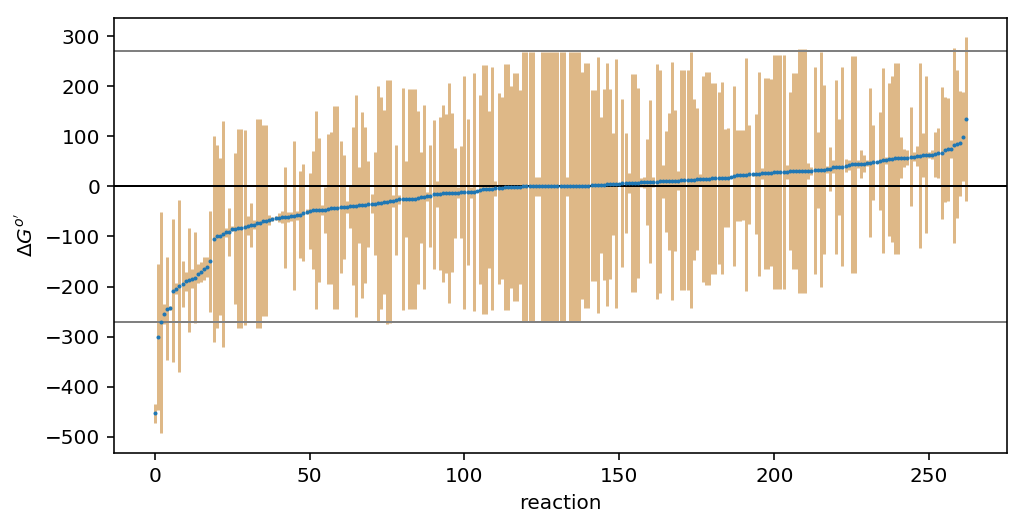

In [34]:
df_TECRDB= df_TECRDB.sort_values('coef')
mean = df_TECRDB['coef']
std  = df_TECRDB['cov']

fig, ax = plt.subplots(figsize=(8,4))
ax.errorbar(range(0,len(df_TECRDB.index)), mean, yerr=3*std, markersize='1',fmt='o', ecolor='burlywood', capthick=1)#,alpha=0.4)
ax.axhline(y=0,linewidth=1,color='k')

ax.axhline(y=270,linewidth=1,color='grey')
ax.axhline(y=-270,linewidth=1,color='grey')
ax.fill_between(range(0,len(df_TECRDB.index)), -270, 270, alpha=0.2, color='white')
plt.xlabel('reaction')
plt.ylabel('$\Delta G^{o\'}$')
# ax.errorbar(prediction.reaction, mean, yerr=std, fmt='-o') #fmt=None to plot bars only

Text(0,0.5,'Count')

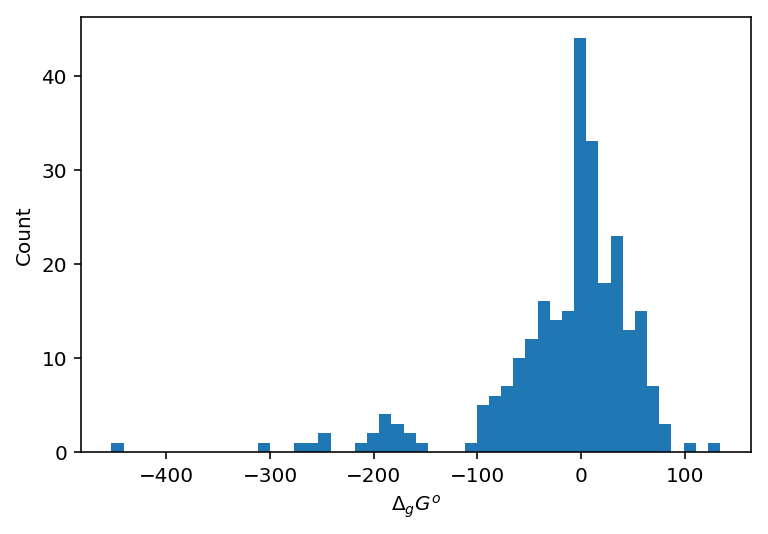

In [17]:
plt.hist(df_TECRDB['coef'], bins=50)
# plt.xscale('log')
plt.xlabel('$\Delta_g G^o$')
plt.ylabel('Count')



/Users/linuswang/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


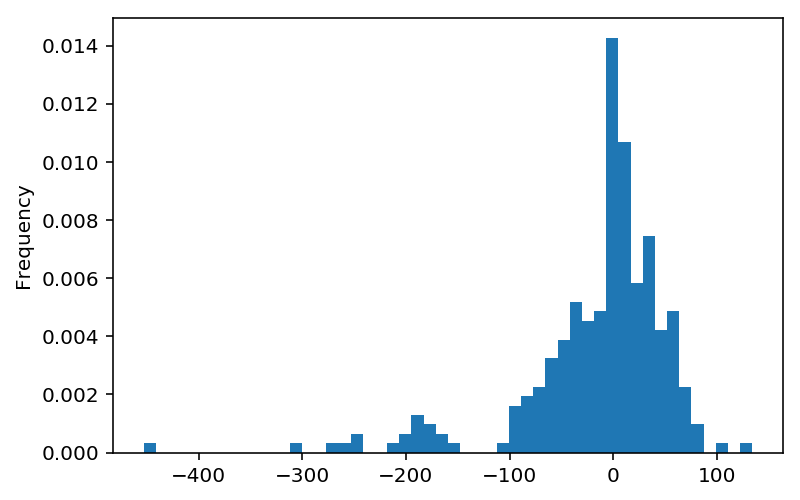

In [18]:
df_TECRDB.coef.plot(kind='hist', normed=True,bins=50)

# range = np.arange(-100, 100, 0.001)
# plt.plot(range, norm.pdf(range,0,1))

In [19]:
sns.distplot(df_TECRDB['coef'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

NameError: name 'sns' is not defined

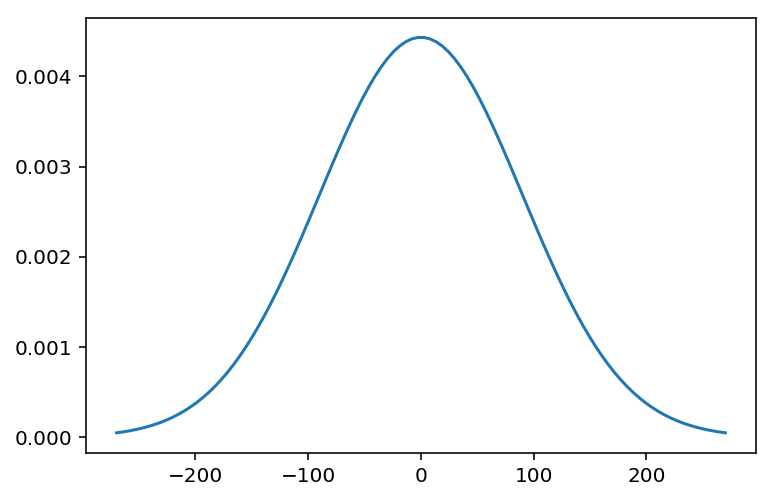

In [36]:
import scipy.stats as stats
mu = 0
sigma = 90
x = np.linspace(-270, 270, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

In [39]:
df_TECRDB[(df_TECRDB['coef']<1e-3) & (df_TECRDB['coef']>-1e-3)]

,coef,cov,group
130,-2.497525e-10,89.894796,CC(=C)N
162,-1.420590e-10,89.894796,CC(C)(C)S
473,-8.454125e-12,89.894796,C[C@H](N)S
206,-2.610767e-13,89.894796,CC(C)[NH3+]
794,-1.847460e-15,6.279318,S
861,-5.259381e-16,6.279318,[Fe]
1244,-1.068854e-78,89.894796,cc(C)s
1396,-1.414683e-145,89.894796,nc(N)[nH]
1425,-2.952866e-161,89.894796,nc[nH+]
1377,1.217366e-143,89.894796,csc


In [40]:
df_TECRDB[(df_TECRDB['coef']<-270)]

,coef,cov,group
869,-453.039887,6.279318,[Mg+2]
904,-301.175743,48.781402,[O-]P
730,-271.286194,73.735211,O=P


In [41]:
loaded_model.sigma_

array([[ 8.08107430e+03,  3.51924408e-14,  1.53966929e-14, ...,
         0.00000000e+00,  0.00000000e+00,  2.47996732e-13],
       [ 3.51924408e-14,  8.08107430e+03,  4.81696534e-13, ...,
         0.00000000e+00,  0.00000000e+00, -2.94736692e-12],
       [ 1.31971653e-14,  5.43283306e-13,  8.08107430e+03, ...,
         0.00000000e+00,  0.00000000e+00, -4.83896062e-14],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.05041872e+03,  4.03065559e+03,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.03065559e+03,  4.05041872e+03,  0.00000000e+00],
       [ 2.47859261e-13, -2.94571728e-12, -4.39905511e-14, ...,
         0.00000000e+00,  0.00000000e+00,  7.48337600e+03]])

In [44]:
loaded_model.alpha_

0.025237761242655997

In [48]:
loaded_model.lambda_

0.0001237459232125717

In [46]:
# loaded_model.alpha_2

1e-06

In [50]:
1/loaded_model.lambda_

8081.074301592889